1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [107]:
df = pd.read_csv('iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [129]:
# Se declara encoder para futuras funciones
le = preprocessing.LabelEncoder()
variety = list(df.variety)
var_encoded = le.fit_transform(variety)

In [109]:
def get_KModels(df, lista, encoder, size=0.20, random_state=1):
    # Función que retorna una lista con cada K de número de vecinos especificado.
    # También retorna los conjuntos de train y test

    X = np.array(df.loc[:, :'petal.width'])
    y = np.array(var_encoded)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random_state)
    train_test = [X_train, X_test, y_train, y_test]

    models = [KNeighborsClassifier(n_neighbors=n) for n in lista]
    for k in models:
        k.fit(X_train, y_train)

    return models, train_test

In [110]:
kmodels, train_test = get_KModels(df, [3, 7], encoder=le)
X_train = train_test[0]
X_test = train_test[1]
y_train = train_test[2]
y_test = train_test[3]

In [111]:
k3 = kmodels[0]
k7 = kmodels[1]

In [112]:
var1 = [15.7,2.8,9.5,0.1]
var2 = [1.7,3.8,4.5,11.3]
variables = [var1, var2]

In [113]:
def get_KPredict_Score(variables, k_list, X_train, y_train, X_test, y_test, encoder):
    # Función para visualizar las prediciones para un set de variables y el score para cada K.
    for k in k_list:
        neighbors = k.get_params()['n_neighbors']
        for i, var in enumerate(variables):
            print(f'K{neighbors} (Var_{i}):', encoder.inverse_transform(k.predict([var]))[0])
        print('----------------------')
        print(f'K{neighbors} Train Score:', k.score(X_train, y_train))
        print(f'K{neighbors} Test Score:', k.score(X_test, y_test))
        print('======================')

In [114]:
get_KPredict_Score(variables, kmodels, X_train, y_train, X_test, y_test, encoder=le)

K3 (Var_0): Virginica
K3 (Var_1): Virginica
----------------------
K3 Train Score: 0.95
K3 Test Score: 1.0
K7 (Var_0): Virginica
K7 (Var_1): Virginica
----------------------
K7 Train Score: 0.9666666666666667
K7 Test Score: 0.9666666666666667


In [115]:
import matplotlib.pyplot as plt

def get_KScore(X_train, y_train):
    # Función para visualizar el comportamiento de las distintas Ks en un rango de 1 a 20 para un conjunto determinado.
    k_range = range(1, 20)
    scores = {}
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        scores[k] = knn.score(X_test, y_test)
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, list(scores.values()))
    plt.xticks([0,5,10,15,20])

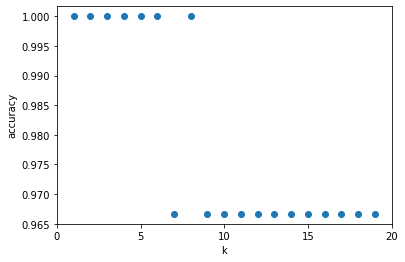

In [116]:
get_KScore(X_train, y_train)

In [117]:
kmodels_60, train_test_60 = get_KModels(df, [3,7],encoder=le, size=0.6) #Se mantiene el random_state=41 para evaluar las diferencias.
X_train_60 = train_test_60[0]
X_test_60 = train_test_60[1]
y_train_60 = train_test_60[2]
y_test_60 = train_test_60[3]

In [118]:
get_KPredict_Score(variables, kmodels_60, X_train_60, y_train_60, X_test_60, y_test_60, encoder=le) # Modelos con 60% Test

K3 (Var_0): Virginica
K3 (Var_1): Virginica
----------------------
K3 Train Score: 0.9833333333333333
K3 Test Score: 0.9444444444444444
K7 (Var_0): Virginica
K7 (Var_1): Virginica
----------------------
K7 Train Score: 0.9833333333333333
K7 Test Score: 0.9888888888888889


In [119]:
get_KPredict_Score(variables, kmodels, X_train, y_train, X_test, y_test, encoder=le) # Modelos anteriores

K3 (Var_0): Virginica
K3 (Var_1): Virginica
----------------------
K3 Train Score: 0.95
K3 Test Score: 1.0
K7 (Var_0): Virginica
K7 (Var_1): Virginica
----------------------
K7 Train Score: 0.9666666666666667
K7 Test Score: 0.9666666666666667


In [120]:
# Apenas hay diferencia entre las predicciones y scores de cada conjunto. K3 empeora y K7 mejora.

In [121]:
# Eliminamos 'Setosa' del Dataframe
filtered_df = df[df.variety != 'Setosa']
filtered_df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


In [127]:
le2 = preprocessing.LabelEncoder()
variety2 = list(filtered_df.variety)
var_encoded = le2.fit_transform(variety2)

filtered_kmodels, filtered_train_test = get_KModels(filtered_df, [3, 7],encoder=le)

filtered_X_train = filtered_train_test[0]
filtered_X_test = filtered_train_test[1]
filtered_y_train = filtered_train_test[2]
filtered_y_test = filtered_train_test[3]

In [128]:
get_KPredict_Score(variables, filtered_kmodels, filtered_X_train, filtered_y_train, filtered_X_test, filtered_y_test, encoder=le2)

K3 (Var_0): Virginica
K3 (Var_1): Virginica
----------------------
K3 Train Score: 0.975
K3 Test Score: 0.85
K7 (Var_0): Virginica
K7 (Var_1): Virginica
----------------------
K7 Train Score: 0.9625
K7 Test Score: 0.9


In [ ]:
# Las diferencias de score son muy pequeñas entre el Dataframe original y el filtrado.

In [ ]:
# Dada su alta precisión, el algoritmo KNN es muy adecuado para este caso. 